# Assignment 1: Sentiment Analysis

### 1. Download Relevant NTLK Modules

In [147]:
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\luket\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\luket\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### 2. Overview of Articles

In this assignment, I seek to perform a sentiment analysis on two news articles, one published by Fox News and the other published by Reuters. Both articles pertain to allegations of plagiarism directed at (former) Harvard University President Claudine Gay.

The Fox News article focuses on a recent complaint submitted to Harvard's research integrity officer outlining 40 instances in which Gay quoted or paraphrased the works of other scholars without proper attribution. The author seems to be building a case for Gay's removal from office by highlighting the extent of her alleged plagiarism and by suggesting that the allegations are well substantiated. Additionally, the article mentions certain individuals and entities (i.e., Harvard's governing board and NAACP President Derrick Johnson) that defended Gay's position despite the plagiarism claims, placing them in a negative light. Even though the author does not explicitly call for Gay's resignation, he chooses to use incriminating sources and strongly implies that Gay should face disciplinary actions for her past behavior.

The Reuters article, on the other hand, focuses on Gay and the Harvard administration's response to the plagiarism allegations, including the Harvard Corporation's investigations into Gay's published works, as well as the measures Gay took (and was planning to take) to correct the attribution issues. Whereas the Fox News article contains several opinion-based quotes, the Reuters article is almost entirely based on descriptions of actions and events. However, the Reuters article places heavier emphasis on Gay's congressional testimony about antisemitism on campus, which is another subject of controversy.

### 3. PDF Text Extraction

The code below extracts text from the two PDF news articles using PyPDF2. The original extracted text contained many line break characters (\n), which I replaced with blank spaces. Additionally, I used the RE library to remove page numbers (e.g., "1 / 5") from the extracted text. A major remaining issue is that the extracted text contains a number of extra and missing spaces (mostly the former) at unpredictable places, which cannot be easily resolved. This issue likely results from the fact that PDF stores content at specific X, Y cooridnates rather than in linear sequences, and when PyPDF2 attempts to extract the text, it sometimes misinterprets the amount of space between two letters or words. Another potential issue is that the PDF files contain some extraneous text, such as links to other news articles and advertisement placeholders, which may skew the results of the sentiment analysis. Compared to HTML text extraction, it is more difficult to single out the body paragraphs in a PDF document programmatically.

In [152]:
import PyPDF2
import re

file_fox = open("1 - Fox News.pdf", "rb")
reader_fox = PyPDF2.PdfReader(file_fox)
text_fox = ""

file_reuters = open("1 - Reuters.pdf", "rb")
reader_reuters = PyPDF2.PdfReader(file_reuters)
text_reuters = ""

for page in reader_fox.pages:
    text_fox += page.extract_text()
text_fox = text_fox.replace("\n", " ")
text_fox = re.sub(r"\d+ / \d+", "", text_fox)

for page in reader_reuters.pages:
    text_reuters += page.extract_text()
text_reuters = text_reuters.replace("\n", " ")
text_reuters = re.sub(r"\d+ / \d+", "", text_reuters)

file_fox.close()
file_reuters.close()

print(text_fox)
print("\n")
print(text_reuters)

Brian FloodEmbattled Harvard University President Claudine Gay hit with more plagiarism charges foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges Media Harvard ‘received a complaint outlining over 40 allegations of plagiarism,’ according to the Free Beacon  By Brian Flood  Fox News Published December 20, 2023 12:59pm EST Harvard president facing 40 new allegations of plagiarism Fox News' Molly Line reports the latest on the allegations.  Embattled Harvard University President Claudine Gay  has been slapped with additional charges of plagiarism.  The Washington Free Beacon  reported Harvard "received a complaint outlining over 40 allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's research integrity of ficer, Stacey Springs, outlining the claims.  "The document paints a picture of a pattern of misconduct more extensive than has been previously reported and puts the Harvard Corporation, the university

### 4. Sentiment Analysis of Articles

The sentiment analysis shows that even though both news articles contain predominantly neutral words (81.1% of the Fox News article and 88.7% of the Reuters article), the Fox News article contains a higher proportion of positive words (10%) than negative words (8.9%), whereas the Reuters article contains a higher proportion of negative words (9.1%) than positive words (2.2%). More surprisingly, the Fox News article is rated as having a strongly positive overall sentiment (with a compound score of 0.8403), while the Reuters article is rated as having a strongly negative overall sentiment (-0.9735). These results are inconsistent with (and, in fact, opposite from) my own assessment of the two articles' sentiment. When I tried to examine the specific words NLTK coded as positive and negative in each article (see the last two code blocks in this section), the findings pointed to three main reasons why the sentiment analysis outcomes are so unexpected. First, the word "free", which is used many times in the Fox News article in reference to the Washington Free Beacon, is classified as a positive word and therefore substantially raises the Fox News article's sentiment score. Second, some words, such as the word "admits" in the Fox News article, are labeled as positive even though they are used in negative contexts (e.g., "admits inadequate citation"). Third, I think the positive/negative categorization of certain words in NLTK are questionable, if not concerning (e.g., marking "supremacist" and "slap" as positive words).

In [154]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r"\w+'?\w*")
tokens_fox = tokenizer.tokenize(text_fox)
tokens_reuters = tokenizer.tokenize(text_reuters)

print(tokens_fox)
print("\n")
print(tokens_reuters)

['Brian', 'FloodEmbattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'hit', 'with', 'more', 'plagiarism', 'charges', 'foxnews', 'com', 'media', 'embattled', 'harvard', 'university', 'president', 'claudine', 'gay', 'hit', 'more', 'plagiarism', 'charges', 'Media', 'Harvard', 'received', 'a', 'complaint', 'outlining', 'over', '40', 'allegations', 'of', 'plagiarism', 'according', 'to', 'the', 'Free', 'Beacon', 'By', 'Brian', 'Flood', 'Fox', 'News', 'Published', 'December', '20', '2023', '12', '59pm', 'EST', 'Harvard', 'president', 'facing', '40', 'new', 'allegations', 'of', 'plagiarism', 'Fox', "News'", 'Molly', 'Line', 'reports', 'the', 'latest', 'on', 'the', 'allegations', 'Embattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'has', 'been', 'slapped', 'with', 'additional', 'charges', 'of', 'plagiarism', 'The', 'Washington', 'Free', 'Beacon', 'reported', 'Harvard', 'received', 'a', 'complaint', 'outlining', 'over', '40', 'allegations', 'of', 'plagiarism', '

In [156]:
sentiment_text_fox = " ".join([word for word in tokens_fox if word not in nltk.corpus.stopwords.words('english')])
sentiment_text_reuters = " ".join([word for word in tokens_reuters if word not in nltk.corpus.stopwords.words('english')])

print(sentiment_text_fox)
print("\n")
print(sentiment_text_reuters)

Brian FloodEmbattled Harvard University President Claudine Gay hit plagiarism charges foxnews com media embattled harvard university president claudine gay hit plagiarism charges Media Harvard received complaint outlining 40 allegations plagiarism according Free Beacon By Brian Flood Fox News Published December 20 2023 12 59pm EST Harvard president facing 40 new allegations plagiarism Fox News' Molly Line reports latest allegations Embattled Harvard University President Claudine Gay slapped additional charges plagiarism The Washington Free Beacon reported Harvard received complaint outlining 40 allegations plagiarism Gay T uesday noting letter sent Harvard's research integrity ficer Stacey Springs outlining claims The document paints picture pattern misconduct extensive previously reported puts Harvard Corporation university's governing body said initiated independent review Gay's scholarship issued statement support leadership back spotlight Free Beacon reporter Aaron Sibarium wrote H

In [158]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
print("Fox News Article Sentiment: ", sid.polarity_scores(sentiment_text_fox))
print("\n")
print("Reuters Article Sentiment: ", sid.polarity_scores(sentiment_text_reuters))

Fox News Article Sentiment:  {'neg': 0.089, 'neu': 0.811, 'pos': 0.1, 'compound': 0.8403}


Reuters Article Sentiment:  {'neg': 0.091, 'neu': 0.887, 'pos': 0.022, 'compound': -0.9735}


In [160]:
positive_words = []
negative_words = []

for word in sentiment_text_fox.split():
    word_score = sid.polarity_scores(word)["compound"]
    
    if word_score > 0.05:
        positive_words.append(word)
    elif word_score < -0.05:
        negative_words.append(word)

print("Positive words in Fox News article:", positive_words)
print("Negative words in Fox News article:", negative_words)
print("\n")

positive_words = []
negative_words = []

for word in sentiment_text_reuters.split():
    word_score = sid.polarity_scores(word)["compound"]  # Get sentiment score
    
    if word_score > 0.05:  # Positive word
        positive_words.append(word)
    elif word_score < -0.05:  # Negative word
        negative_words.append(word)

# Print results
print("Positive words in Reuters article:", positive_words)
print("Negative words in Reuters article:", negative_words)

Positive words in Fox News article: ['Free', 'Free', 'integrity', 'support', 'Free', 'ADMITS', 'Free', 'well', 'intense', 'admitted', 'Free', 'Free', 'integrity', 'SUPREMACIST', 'supremacist', 'Free', 'integrity', 'sentences', 'Free', 'integrity', 'giving', 'slap', 'powerful', 'Promoted']
Negative words in Fox News article: ['charges', 'charges', 'complaint', 'charges', 'complaint', 'complainant', 'fear', 'controversial', 'accusations', 'inadequate', 'violated', 'problematic', 'violate', 'CRITICS', 'attacks', 'missing', 'complaint', 'accusations', 'violate', 'Lurking', 'complaint', 'accused', 'charges']


Positive words in Reuters article: ['integrity', 'intense', 'apologized', 'well']
Negative words in Reuters article: ['Confronting', 'errors', 'pressure', 'resign', 'inadequate', 'pressure', 'resign', 'violate', 'protests', 'war', 'resigned', 'firing', 'killed']


### 5. Sentiment Analysis of Article Titles

If we only consider the article titles, the Fox News article is rated as having a somewhat negative overall sentiment (with a compound score of -0.2732), whereas the Reuters article is rated as having a perfectly neutral overall sentiment (with a compound score of 0). This is more in line with my own assessment, although I had expected the Fox News article title to have an even more negative sentiment score, since "embattled", "hit", "plagiarism", and "charges" all carry negative connotations (but I suppose "hit" and "charges" can be neutral in other contexts). I had also expected the Reuters article title to have a slightly negative sentiment score, given the word "plagiarism". In any case, these results are significantly different from those provided by the overall sentiment analysis. While conducting a sentiment analysis on an entire article may enable NLTK to make a more "informed" decision, it could also be hindered by the noise in the data and the various programmatic limitations I mentioned above. Unfortunately, in this case, the disadvantages of conducting a full sentiment analysis may outweigh its benefits.

In [165]:
tokenizer = RegexpTokenizer(r"\w+'?\w*")
title_fox = tokenizer.tokenize("Embattled Harvard University President Claudine Gay hit with more plagiarism charges")
title_reuters = tokenizer.tokenize("Harvard president will submit dissertation edits after plagiarism allegations")

print(title_fox)
print("\n")
print(title_reuters)

['Embattled', 'Harvard', 'University', 'President', 'Claudine', 'Gay', 'hit', 'with', 'more', 'plagiarism', 'charges']


['Harvard', 'president', 'will', 'submit', 'dissertation', 'edits', 'after', 'plagiarism', 'allegations']


In [167]:
sentiment_title_fox = " ".join([word for word in title_fox if word not in nltk.corpus.stopwords.words('english')])
sentiment_title_reuters = " ".join([word for word in title_reuters if word not in nltk.corpus.stopwords.words('english')])

print(sentiment_title_fox)
print("\n")
print(sentiment_title_reuters)

Embattled Harvard University President Claudine Gay hit plagiarism charges


Harvard president submit dissertation edits plagiarism allegations


In [169]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
print("Fox News Article Title Sentiment: ", sid.polarity_scores(sentiment_title_fox))
print("\n")
print("Reuters Article Title Sentiment: ", sid.polarity_scores(sentiment_title_reuters))

Fox News Article Title Sentiment:  {'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'compound': -0.2732}


Reuters Article Title Sentiment:  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


### 6. Readability Assessment

I assessed the readability of the two articles using three metrics: the Dale-Chall Readability Score (DCRS), the Automated Readability Index (ARI), and the Flesch Reading Ease (FRE) score. The DCRS evaluates readability based on word familiarity. It classifies a word as "difficult" if it does not appear in a pre-defined list of 3,000 common words. The Fox News and Reuters articles have similar DCRS scores (12.68 and 12.53 respectively), which put them on the highest reading level (i.e., college graduate). ARI measures readability based on word length and sentence length, without considering whether or not the words are common. Once again, both news articles received high scores (21.36 for the Fox News article and 20.47 for the Reuters article), which translate to a "college graduate" reading level. The FRE metric determines readability based on average sentence length and average syllables per word, where a lower FRE score corresponds to a more difficult text. Even though both news articles are classified as being "very confusing" (i.e., the second most difficult level), the Reuters article seems to have a considerably lower score (15.88) than the Fox News article (21.08). 

In [171]:
from readability import Readability

readability_fox = Readability(text_fox)
dcrs_fox = readability_fox.dale_chall()
ari_fox = readability_fox.ari()
fre_fox = readability_fox.flesch()
print("Fox News article Dale-Chall: ", dcrs_fox)
print("Fox News article ARI: ", ari_fox)
print("Fox News article FRE: ", fre_fox)
print("\n")

readability_reuters = Readability(text_reuters)
dcrs_reuters = readability_reuters.dale_chall()
ari_reuters = readability_reuters.ari()
fre_reuters = readability_reuters.flesch()
print("Reuters article Dale-Chall: ", dcrs_reuters)
print("Reuters article ARI: ", ari_reuters)
print("Reuters article FRE: ", fre_reuters)

Fox News article Dale-Chall:  score: 12.6827822273074, grade_levels: ['college_graduate']
Fox News article ARI:  score: 21.356991609458426, grade_levels: ['college_graduate'], ages: [24, 100]
Fox News article FRE:  score: 21.078215102974838, ease: 'very_confusing', grade_levels: ['college_graduate']


Reuters article Dale-Chall:  score: 12.525279347359382, grade_levels: ['college_graduate']
Reuters article ARI:  score: 20.472318591670245, grade_levels: ['college_graduate'], ages: [24, 100]
Reuters article FRE:  score: 15.877125375697744, ease: 'very_confusing', grade_levels: ['college_graduate']


### 7. Word Cloud

The word clouds generated from the two news articles are shown below. In both word clouds, the words "Harvard" and "Gay" are prominently displayed, which is to be expected given the subject matter at hand. However, words that carry negative connotations, such as "plagiarism" and "allegations", also take up a significant amount of space in the Fox News article word cloud. Meanwhile, the Reuters article word cloud is predominantly occupied by the neutral terms, such as "university", "president", and "dissertation". In some ways, I feel that the word clouds more accurately reflect my own interpretation of the articles' tones than the NLTK sentiment analysis shown above.

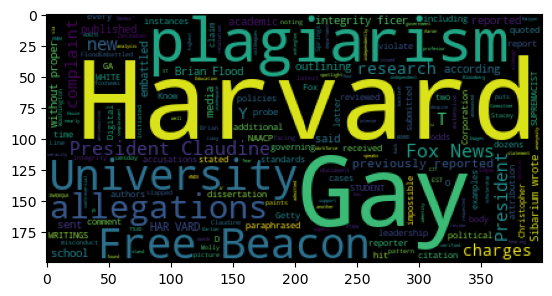

In [141]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

cloud_fox = WordCloud(stopwords=STOPWORDS).generate(sentiment_text_fox)
plt.imshow(cloud_fox);

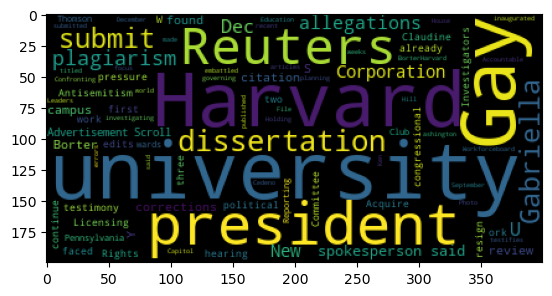

In [143]:
cloud_reuters = WordCloud(stopwords=STOPWORDS).generate(sentiment_text_reuters)
plt.imshow(cloud_reuters);